In [ ]:
%%capture

##############################################################################
# IGNORE if you are running on a local machine and have all the dependencies #
##############################################################################

# installing dependencies --- to be able to run on google colab
# it would take 2-3 minutes
!apt-get install libspatialindex-c4v5;
!pip3 install Rtree;
!pip3 install osmnx;
!pip3 install tqdm;
!pip3 install ipyleaflet;

# You need to upload Utilities.zip in /content directory which is the default
!unzip Utilities.zip

In [1]:
import osmnx as ox
import networkx as nx
from Utilities.utils import *

## Getting the data

`osmnx` goes to OpenStreetMaps API and request the `.osm` file and parse it, but as you remember from our discussion in the README that not all nodes are grouped properly in OpenStreetMaps and we end up with multiple connected components in the same area when it should have been complete, although maybe our scope is small to give us all the nodes so some ways/relation are destructed.

`osmnx` default behavior is to give you back the biggest component in that area and that is it, we will turn that option off.

**1. Turning textual representation of a location to a graph**  
Using [`osmnx.graph.graph_from_address`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_address)

In [68]:
# see how we give informal address to the API
# if you can enter the address in OpenStreetMaps and find it
# osmnx will find it -- they both use Nominatim for geodecoding
G = ox.graph_from_address(address = "east harbour toronto", dist = 700, retain_all = True)

In [69]:
len(G)

449

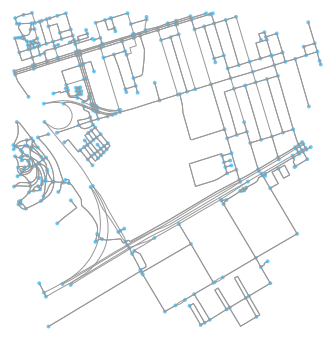

In [70]:
fig, ax = ox.plot_graph(G)

we have "10" networkx in our graph

In [10]:
nx.number_strongly_connected_components(G)

10

In that case we go to use [OSRM](http://project-osrm.org/) to find the routes and use ipyleaflet or folium or our wrapper to see that route, it will be much clearer when we start doing case studies.

**2- Bounding box around some area**  
Using [`osmnx.graph_from_bbox`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_bbox) bbox stands for bounding box and is formed from four number  

(northern latitude of bounding box,  
southern latitude of bounding box,  
eastern longitude of bounding box,   
western longitude of bounding box)  

In [11]:
G = ox.graph_from_bbox(-37.7860, -37.8359, 144.9903, 144.9269 , retain_all = True)

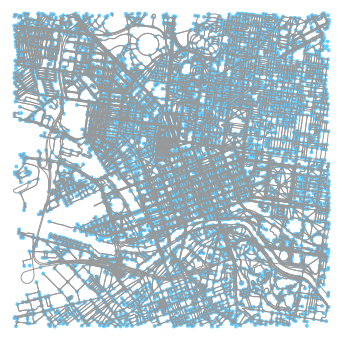

In [12]:
fig, ax = ox.plot_graph(G)

In [13]:
len(G)

17935

**3- From `osm` file**  
Using [`osmnx.graph_from_xml`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_xml)

We will get into OverPass API and how to use its query language in Open-Datasets repositories but take it as it is for now.

The following OverPass QL generated the `.osm` file we will import its data  
  
```  

(
  node(50.746,7.154,50.748,7.157);
  <;
  >;
);
out meta;  

```


In [14]:
G = ox.graph_from_xml("./data/data1.osm", retain_all = True)

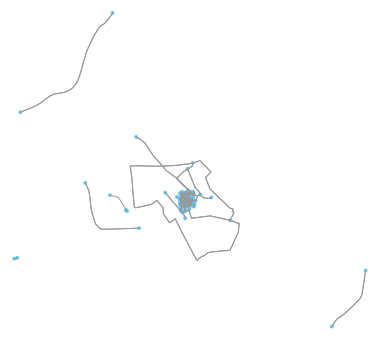

In [15]:
fig, ax = ox.plot_graph(G)

# Stats about the map

In [17]:
ox.basic_stats(G)

{'n': 369,
 'm': 804,
 'k_avg': 4.357723577235772,
 'intersection_count': 340,
 'streets_per_node_avg': 2.1842818428184283,
 'streets_per_node_counts': {0: 0, 1: 29, 2: 286, 3: 11, 4: 43},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.07859078590785908,
  2: 0.7750677506775068,
  3: 0.02981029810298103,
  4: 0.11653116531165311},
 'edge_length_total': 44594.94099999992,
 'edge_length_avg': 55.466344527363084,
 'street_length_total': 22510.22399999999,
 'street_length_avg': 55.856635235731986,
 'street_segments_count': 403,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.3760642216065946,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [19]:
ox.extended_stats(G,connectivity = True, ecc = True, bc=True, cc=True) # there is other options

{'avg_neighbor_degree': {31941906: 1.0,
  33078439: 1.0,
  51289968: 1.0,
  56553599: 1.0,
  69291476: 1.0,
  69291487: 1.0,
  90635840: 0.0,
  90635845: 0.5,
  96133770: 1.6666666666666667,
  248035677: 3.0,
  254046337: 2.0,
  254047899: 1.0,
  254142774: 1.0,
  255300916: 1.0,
  274246241: 1.0,
  291435953: 1.6666666666666667,
  291435955: 3.0,
  291435956: 3.0,
  291435959: 4.0,
  291438871: 1.0,
  291438873: 1.0,
  338833557: 2.0,
  470930364: 1.0,
  470930365: 1.0,
  1212226020: 2.0,
  1212226024: 2.0,
  1212226026: 2.0,
  1212226028: 2.0,
  1212226030: 2.0,
  1212226031: 2.0,
  1212226038: 2.0,
  1212226041: 2.0,
  1212226042: 2.0,
  1212226043: 2.0,
  1212226044: 2.0,
  1212226052: 2.0,
  1212226061: 2.0,
  1212226065: 4.0,
  1212226069: 2.0,
  1212226071: 1.0,
  1212226085: 2.0,
  1212226087: 2.0,
  1212226090: 2.0,
  1212226091: 2.0,
  1212226104: 2.0,
  1212226107: 2.0,
  1212226110: 2.0,
  1212226125: 2.0,
  1212226127: 2.0,
  1212226130: 1.0,
  1212226131: 2.0,
  121222613

The above dictionary is huge but I want to point out `center`, `diameter` fields in the above dict because it's super beneficial to know them in some situations

In [20]:
ox.extended_stats(G,connectivity = True, ecc = True, bc=True, cc=True)['center']

[4664702584]

In [21]:
ox.extended_stats(G,connectivity = True, ecc = True, bc=True, cc=True)['diameter']

35.769000000000005

Getting **geopandas** data frames to have a data structure representing the nodes and the ways in the graph, this is super important.

In [34]:
nodes, ways =  ox.graph_to_gdfs(G)

In [35]:
nodes

,y,x,osmid,highway,geometry
31941906,50.737975,7.114133,31941906,NaN,POINT (7.11413 50.73798)
33078439,50.747999,7.150115,33078439,traffic_signals,POINT (7.15011 50.74800)
51289968,50.744062,7.154970,51289968,NaN,POINT (7.15497 50.74406)
56553599,50.775645,7.137325,56553599,NaN,POINT (7.13732 50.77565)
69291476,50.736020,7.198858,69291476,NaN,POINT (7.19886 50.73602)
...,...,...,...,...,...
6873531529,50.747102,7.154193,6873531529,NaN,POINT (7.15419 50.74710)
6873531530,50.747110,7.154185,6873531530,NaN,POINT (7.15419 50.74711)
6874227823,50.752545,7.156837,6874227823,NaN,POINT (7.15684 50.75254)
7532007566,50.747869,7.156775,7532007566,NaN,POINT (7.15678 50.74787)


Select the data of one row

In [49]:
nodes.loc[31941906] #this acts as dictionary to access the inner variables

y                                 50.738
x                                7.11413
osmid                           31941906
highway                              NaN
geometry    POINT (7.1141332 50.7379754)
Name: 31941906, dtype: object

In [36]:
ways

,u,v,key,osmid,name,highway,oneway,length,geometry,maxspeed,bridge,lanes,ref,service,access
0,31941906,1380744830,0,123945726,Hans-Steger-Ufer,cycleway,False,55.158,"LINESTRING (7.11413 50.73798, 7.11406 50.73793...",NaN,NaN,NaN,NaN,NaN,NaN
1,33078439,51289968,0,"[32501184, 6174257]","[Friedenstraße, Sebastianusstraße]",residential,False,560.005,"LINESTRING (7.15011 50.74800, 7.15014 50.74798...",30,NaN,NaN,NaN,NaN,NaN
2,51289968,33078439,0,"[32501184, 6174257]","[Friedenstraße, Sebastianusstraße]",residential,False,560.005,"LINESTRING (7.15497 50.74406, 7.15494 50.74424...",30,NaN,NaN,NaN,NaN,NaN
3,56553599,254142774,0,"[34585408, 295167373, 295167374, 32550322, 295...",NaN,"[path, cycleway]",False,2489.244,"LINESTRING (7.13732 50.77565, 7.13727 50.77554...",NaN,yes,NaN,NaN,NaN,NaN
4,69291476,69291487,0,"[31047685, 129988070, 75027463]",Ungartenstraße,tertiary,False,1177.782,"LINESTRING (7.19886 50.73602, 7.19871 50.73538...","[70, 50]",NaN,2,K 8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,6874227823,274246241,2,238669065,NaN,NaN,False,2233.651,"LINESTRING (7.15684 50.75254, 7.15666 50.75203...",NaN,NaN,NaN,NaN,NaN,NaN
800,7532007566,1558201831,0,31347483,Alte Schulstraße,residential,False,32.816,"LINESTRING (7.15678 50.74787, 7.15675 50.74788...",30,NaN,NaN,NaN,NaN,NaN
801,7532007566,96133770,0,"[142380547, 31347483]",Alte Schulstraße,residential,False,147.937,"LINESTRING (7.15678 50.74787, 7.15699 50.74775...",30,NaN,NaN,NaN,NaN,NaN
802,7532007566,7532007570,0,805324291,NaN,service,False,54.859,"LINESTRING (7.15678 50.74787, 7.15710 50.74800...",NaN,NaN,NaN,NaN,NaN,NaN


These are all the ways between the nodes  
let's draw the geometry of one and see the relevance between it and between the actual map

In [62]:
ways.loc[4]

u                                                    69291476
v                                                    69291487
key                                                         0
osmid                         [31047685, 129988070, 75027463]
name                                           Ungartenstraße
highway                                              tertiary
oneway                                                  False
length                                                1177.78
geometry    LINESTRING (7.1988582 50.7360196, 7.1987113 50...
maxspeed                                             [70, 50]
bridge                                                    NaN
lanes                                                       2
ref                                                       K 8
service                                                   NaN
access                                                    NaN
Name: 4, dtype: object

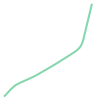

In [63]:
ways.loc[4]['geometry']

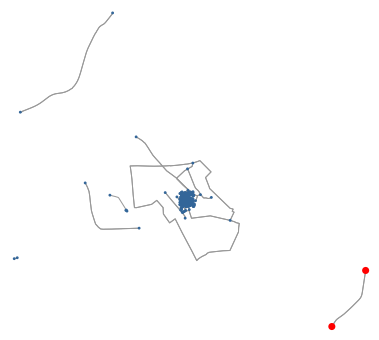

In [64]:
highlighted = [69291476, 69291487]
nc = ['r' if node in highlighted else '#336699' for node in G.nodes()]
ns = [50 if node in highlighted else 8 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

This is how `osmnx` plot the route between incident nodes.

If you went over to [overpass editor](http://overpass-turbo.eu/) and executed the OverPass QL script, you will find that this route has a lot of nodes that are not obvious in `osmnx` graph and seemed to be deleted from the file.

That is right, `osmnx` parser after parsing all the nodes and put it according to ints coordinates on `matplotlib` plot, it will parse ways/relations which includes many nodes that dictate its shapes and curves. The parser will discard any node that is not the begining or ending of a way as it doesn't give us any thing except more memory and computation overhead.

This can be turned of by `simplify` argument in all the getting data functions

watch closely what would happen now

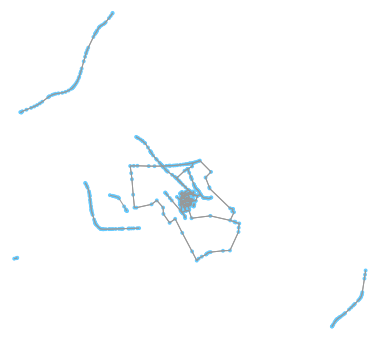

In [71]:
G = ox.graph_from_xml("./data/data1.osm", retain_all = True, simplify = False)
fig, ax = ox.plot_graph(G)

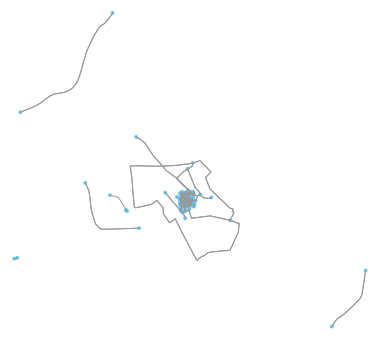

In [72]:
G = ox.graph_from_xml("./data/data1.osm", retain_all = True, simplify = True) # the default behavior
fig, ax = ox.plot_graph(G)